# 2. EDA

In [1]:
#import packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
#load dataset
ames_df = pd.read_csv('../data/df_train_cleaned.csv')
ames_df.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,60,RL,68.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,44,0,0,0,0,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,74,0,0,0,0,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,52,0,0,0,0,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,59,0,0,0,0,0,3,2010,WD,138500


In [3]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ms_subclass     2049 non-null   int64  
 1   ms_zoning       2049 non-null   object 
 2   lot_frontage    2049 non-null   float64
 3   lot_area        2049 non-null   int64  
 4   street          2049 non-null   object 
 5   lot_shape       2049 non-null   object 
 6   land_contour    2049 non-null   object 
 7   utilities       2049 non-null   object 
 8   lot_config      2049 non-null   object 
 9   land_slope      2049 non-null   object 
 10  neighborhood    2049 non-null   object 
 11  condition_1     2049 non-null   object 
 12  condition_2     2049 non-null   object 
 13  bldg_type       2049 non-null   object 
 14  house_style     2049 non-null   object 
 15  overall_qual    2049 non-null   int64  
 16  overall_cond    2049 non-null   int64  
 17  year_built      2049 non-null   i

### Residential Zoning

Rows with entries from categories A (Agriculture), C (Commericial) and I (Industrial) are dropped as the analysis concentrates on the zoning for residential properties. Since the entries from these three categories attributed to 22 entries, they will not have a significant impact on the size of data samples.

In [4]:
ames_df.shape

(2049, 68)

In [5]:
#drop categories A (agr), C (all) and I (all)
ames_df.drop(ames_df[ames_df['ms_zoning'] == 'A (agr)'].index, inplace = True)
ames_df.drop(ames_df[ames_df['ms_zoning'] == 'C (all)'].index, inplace = True)
ames_df.drop(ames_df[ames_df['ms_zoning'] == 'I (all)'].index, inplace = True)

In [6]:
ames_df.shape

(2027, 68)

### Convert Categorical Variables to Numeric

In [7]:
#convert nominal variables to numeric using get_dummies
ames_df = pd.get_dummies(columns=
                         ['ms_subclass', 'ms_zoning','street', 'land_contour', 'lot_config',
                    'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style',
                     'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd','mas_vnr_type','foundation',
                     'heating', 'central_air', 'garage_type', 'sale_type'], data=ames_df)

In [8]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 0 to 2048
Columns: 212 entries, lot_frontage to sale_type_WD 
dtypes: float64(7), int64(30), object(11), uint8(164)
memory usage: 1.1+ MB


In [9]:
#convert strings to numeric in 'lot_shape'
ames_df.lot_shape = ames_df.lot_shape.map({'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4})

In [10]:
ames_df['lot_shape'].value_counts()

1    1273
2     690
3      55
4       9
Name: lot_shape, dtype: int64

In [11]:
#convert strings to numeric in 'utilities'
ames_df.utilities = ames_df.utilities.map({'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4})
ames_df['utilities'].value_counts()

4    2026
2       1
Name: utilities, dtype: int64

In [12]:
#convert strings to numeric in 'land_slope'
ames_df.land_slope = ames_df.land_slope.map({'Gtl': 1, 'Mod': 2, 'Sev': 3})
ames_df['land_slope'].value_counts()

1    1933
2      84
3      10
Name: land_slope, dtype: int64

In [13]:
#convert strings to numeric in 'exter_qual'
ames_df.exter_qual = ames_df.exter_qual.map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
ames_df['exter_qual'].value_counts()

3    1232
4     695
5      81
2      19
Name: exter_qual, dtype: int64

In [14]:
#convert strings to numeric in 'exter_cond'
ames_df.exter_cond = ames_df.exter_cond.map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
ames_df['exter_cond'].value_counts()

3    1765
4     213
2      41
5       7
1       1
Name: exter_cond, dtype: int64

In [15]:
#convert strings to numeric in 'heating_qc'
ames_df.heating_qc = ames_df.heating_qc.map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
ames_df['heating_qc'].value_counts()

5    1062
3     586
4     314
2      63
1       2
Name: heating_qc, dtype: int64

In [16]:
#convert strings to numeric in 'electrical'
ames_df.electrical = ames_df.electrical.map({'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5})
ames_df['electrical'].value_counts()

5    1854
4     132
3      35
2       5
1       1
Name: electrical, dtype: int64

In [17]:
#convert strings to numeric in 'kitchen_qual'
ames_df.kitchen_qual = ames_df.kitchen_qual.map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
ames_df['kitchen_qual'].value_counts()

3    1029
4     804
5     151
2      43
Name: kitchen_qual, dtype: int64

In [18]:
#convert strings to numeric in 'functional'
ames_df.functional = ames_df.functional.map({'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ':8})
ames_df['functional'].value_counts()

8    1897
7      41
6      40
5      27
4      12
3       7
2       2
1       1
Name: functional, dtype: int64

In [19]:
#convert strings to numeric in 'fireplace_qu'
ames_df.fireplace_qu = ames_df.fireplace_qu.map({'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
ames_df['fireplace_qu'].value_counts()

0    978
4    523
3    405
2     59
1     31
5     31
Name: fireplace_qu, dtype: int64

In [20]:
#convert strings to numeric in 'paved_drive'
ames_df.paved_drive = ames_df.paved_drive.map({'N': 1, 'P': 2, 'Y': 3})
ames_df['paved_drive'].value_counts()

3    1853
1     135
2      39
Name: paved_drive, dtype: int64

In [21]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 0 to 2048
Columns: 212 entries, lot_frontage to sale_type_WD 
dtypes: float64(7), int64(41), uint8(164)
memory usage: 1.1 MB


In [22]:
ames_df.isnull().sum()

lot_frontage       0
lot_area           0
lot_shape          0
utilities          0
land_slope         0
                  ..
sale_type_ConLI    0
sale_type_ConLw    0
sale_type_New      0
sale_type_Oth      0
sale_type_WD       0
Length: 212, dtype: int64

### Sales Price Outliers

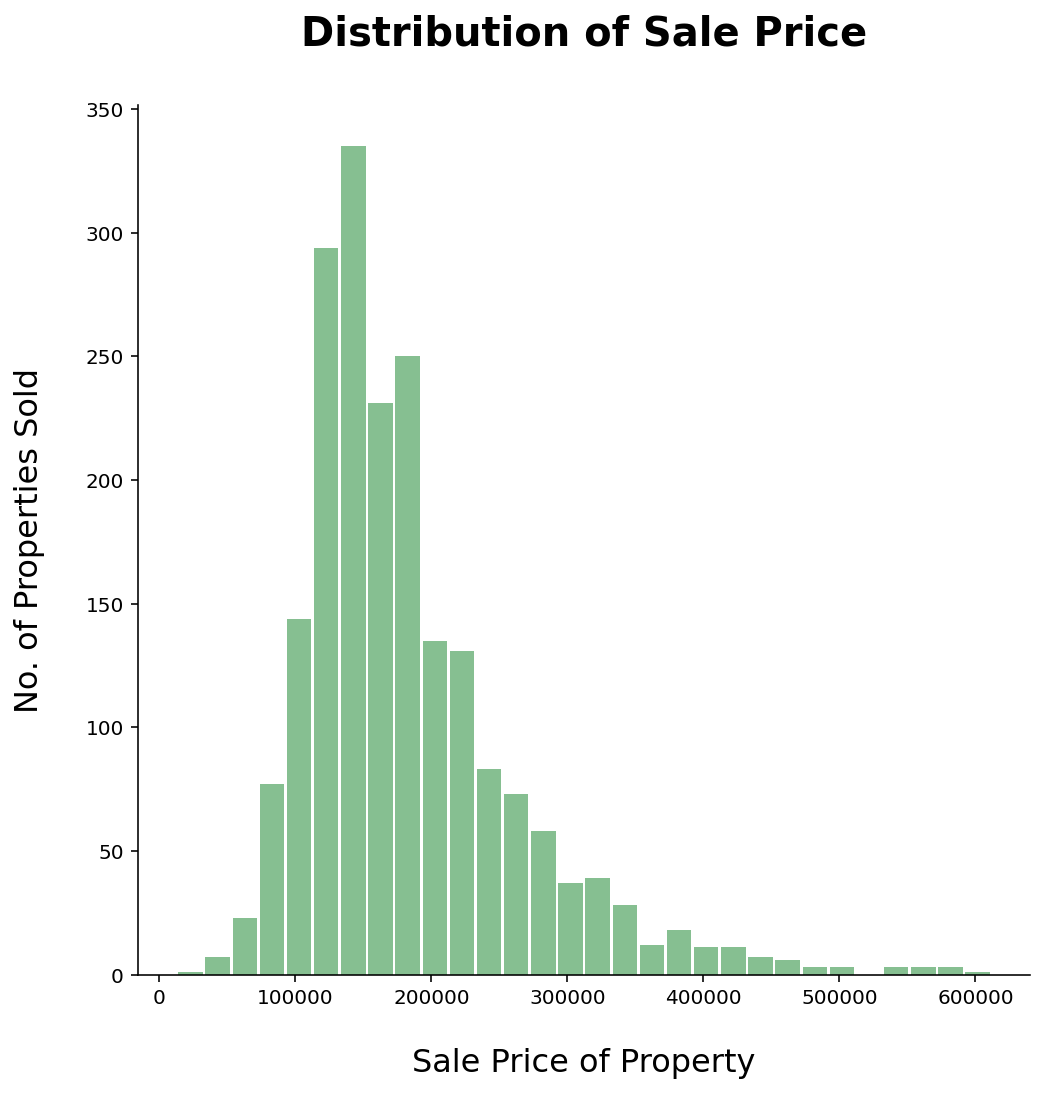

In [23]:
#assign variable name for plot
saleprice_hist = ames_df['saleprice'].hist(figsize = (8,8), bins=30, grid=False, color = '#86bf91', rwidth = 0.9)

#set title and x,y labels
plt.title("Distribution of Sale Price", pad=30, weight='bold', size=20)
plt.xlabel('Sale Price of Property', labelpad=20, size=16)
plt.ylabel('No. of Properties Sold', labelpad=20, size=16)

#despine top and right
saleprice_hist.spines['right'].set_visible(False)
saleprice_hist.spines['top'].set_visible(False)

In [24]:
ames_df['saleprice'].describe()

count      2027.000000
mean     182619.524420
std       78851.366494
min       12789.000000
25%      130000.000000
50%      163500.000000
75%      214700.000000
max      611657.000000
Name: saleprice, dtype: float64

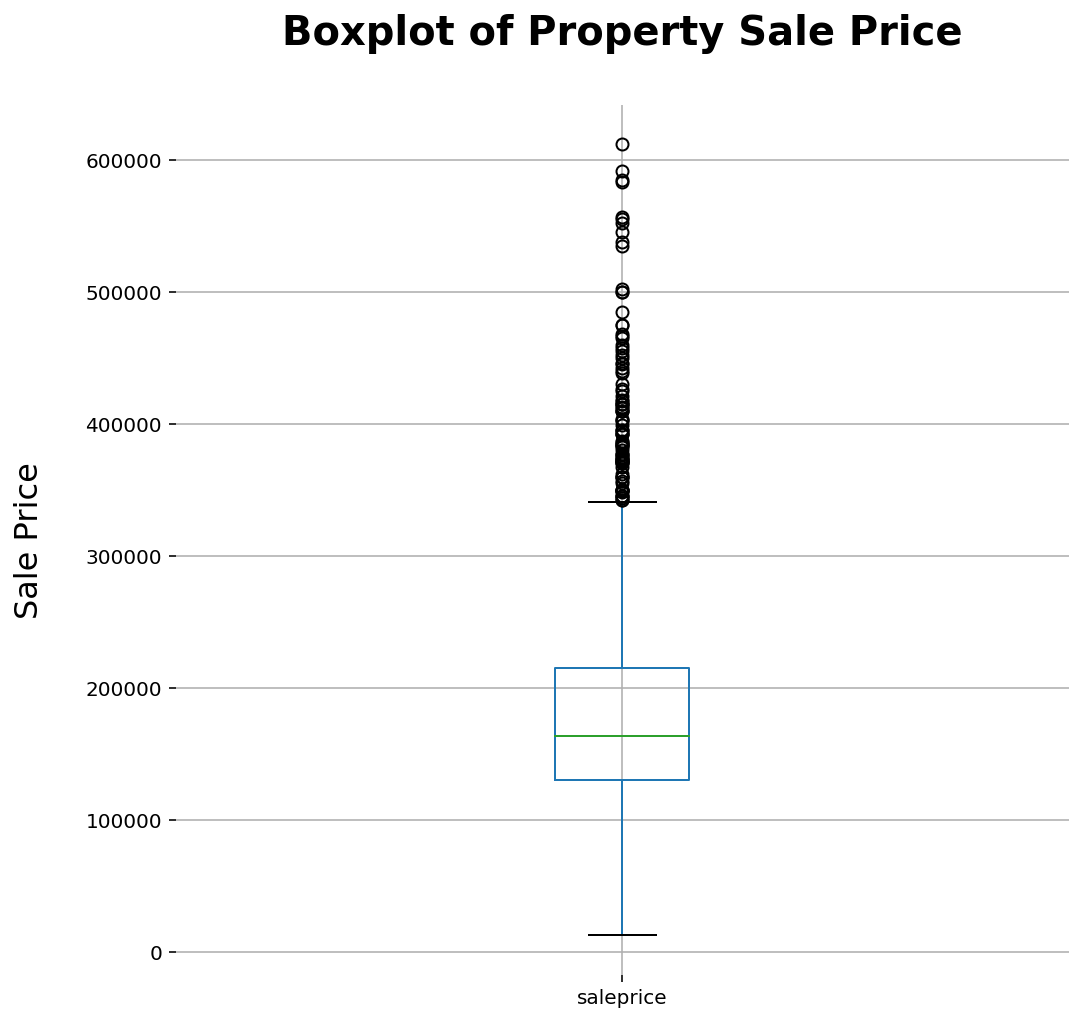

In [25]:
#boxplot for 'saleprice'
saleprice_boxplot = ames_df.boxplot(column=['saleprice'], figsize = (8,8))

#set title and y labels
plt.title("Boxplot of Property Sale Price", pad=30, weight='bold', size=20)
plt.ylabel('Sale Price', labelpad=20, size=16)

#despine
saleprice_boxplot.spines['right'].set_visible(False)
saleprice_boxplot.spines['top'].set_visible(False)
saleprice_boxplot.spines['bottom'].set_visible(False)
saleprice_boxplot.spines['left'].set_visible(False)

### Feature Engineering

In [26]:
#save dataframe to csv
ames_df.to_csv('../data/dummied_train.csv',index=False)